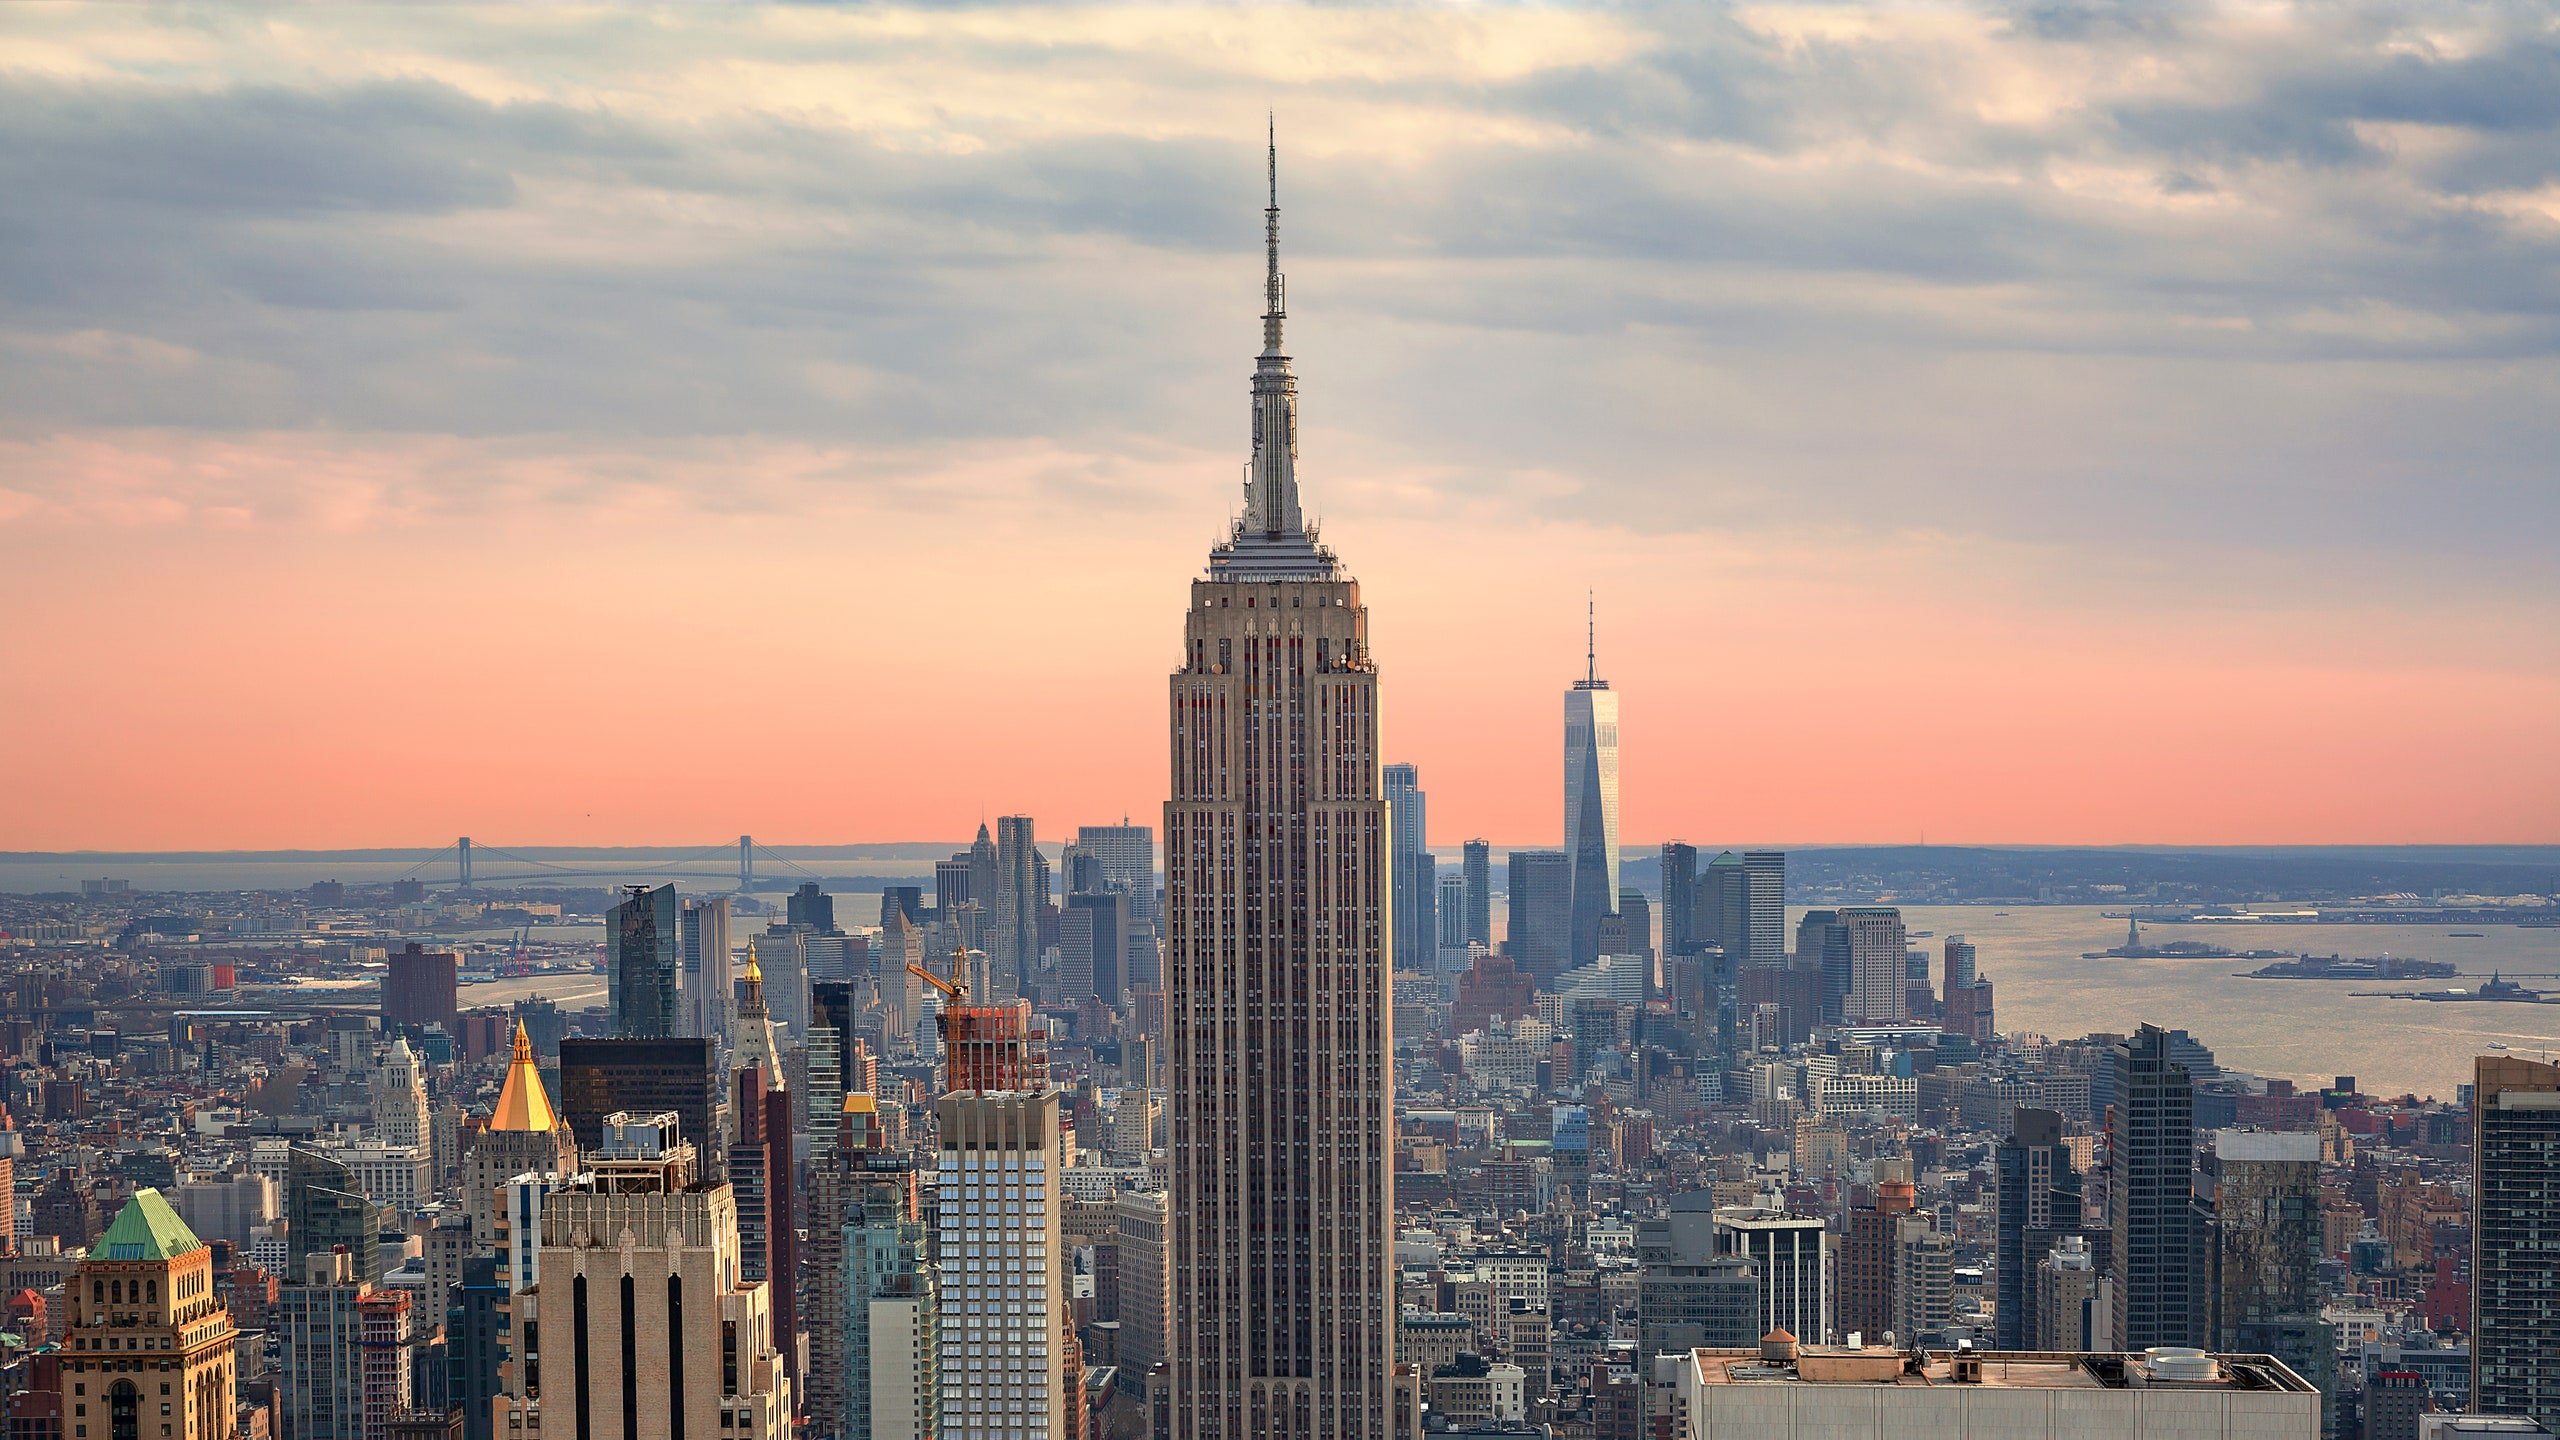

# New York Airbnb Analysis
Author: Jennifer Ha
***

## Overview 
This project analyzes house sales data in King County in Seattle from 2014-2015, which consists of ~21,600 transactions. Through some exploratory data analyses and iterative regression models, we will identify some features that have the strongest relationship with price.. The result shows that the model with feature engineering was the best-performing model, also revealing that waterfront properties, more viewings to potential buyers, and higher grading using King County grading system have the biggest impact on house prices.

## Business Problem
 Questions to consider:
* Question 1
* Question 2
* Question 3

## Data
The dataset consists of ~21,600 rows of real estate transactions from King County, Seattle (WA) from 2014-2015. The columns represent different features associated with each property, which are outlined below. The target variable is the price of the property, which will be used in our models to determine the winning model, along with features that have strong relationships with it.

Prior to iterating regression models and predictions, I conducted some exploratory data analyses to clean up the data using IQR method to prepare it for modeling, and went through several iterations to refine the model.

### Import Libraries and Data

In [1]:
# Import all libraries & packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Import sklearn packages
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, f1_score

import category_encoders as ce
import eli5

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Import my personal functions 
from functions import evaluate

# Remove scientific notation
pd.options.display.float_format = '{:,.5f}'.format

# Display all the columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
# Import data into a dataframe and preview 
df = pd.read_csv('data/airbnb_nyc.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,"20,200,000,000,000.00000",8/4/21,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,9/9/08,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.00000,6.00000,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.00000,1 bath,nan,1.00000,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150,30,1125,30.00000,30.00000,"1,125.00000","1,125.00000",30.00000,"1,125.00000",nan,t,6,36,66,341,8/4/21,48,0,0,11/21/09,11/4/19,4.70000,4.72000,4.62000,4.76000,4.79000,4.86000,4.41000,nan,f,3,3,0,0,0.34000
1,3831,https://www.airbnb.com/rooms/3831,"20,200,000,000,000.00000",8/4/21,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,12/7/08,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,88%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.00000,1.00000,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1.00000,1 bath,1.00000,3.00000,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75,1,730,1.00000,1.00000,"1,125.00000","1,125.00000",1.00000,"1,125.00000",nan,t,0,1,7,212,8/4/21,408,68,0,1/5/15,6/29/21,4.46000,4.59000,4.50000,4.79000,4.81000,4.72000,4.65000,nan,f,1,1,0,0,5.09000
2,5121,https://www.airbnb.com/rooms/5121,"20,200,000,000,000.00000",8/4/21,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2/3/09,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.00000,1.00000,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,nan,Na

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36722 entries, 0 to 36721
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36722 non-null  int64  
 1   listing_url                                   36722 non-null  object 
 2   scrape_id                                     36722 non-null  float64
 3   last_scraped                                  36722 non-null  object 
 4   name                                          36709 non-null  object 
 5   description                                   35486 non-null  object 
 6   neighborhood_overview                         22590 non-null  object 
 7   picture_url                                   36722 non-null  object 
 8   host_id                                       36722 non-null  int64  
 9   host_url                                      36722 non-null 

### Duplicates
Let's start with checking duplicate values in the DataFrame.

In [4]:
# Check for duplicates
df.id.duplicated().sum()

0

Since there are no duplicates, we will move on to removing columns that we do not need for this analysis.

### Features
There are 73 features given in the original dataset. However, many of the features include IDs, URL links, dates, and repetitivd information that we do not need. I have explored each column and decided to drop these columns from the datset.

In [5]:
df.drop(['id','listing_url','scrape_id','last_scraped','name','description','neighborhood_overview','picture_url',
        'host_id','host_url','host_name','host_since','host_location','host_about','host_response_time',
         'host_thumbnail_url','host_is_superhost','host_picture_url','host_neighbourhood','host_listings_count',
         'host_total_listings_count','host_verifications','host_has_profile_pic','host_identity_verified',
         'neighbourhood','bathrooms_text','amenities','minimum_minimum_nights','maximum_minimum_nights',
         'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
         'has_availability','calendar_last_scraped','availability_30','availability_60','availability_90',
         'number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','review_scores_accuracy',
         'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
         'review_scores_value','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], 
        axis=1, inplace=True)

There are also 2 empty columns with no data. Let's remove those as well.

In [6]:
# Drop columns with no data
df.drop(['calendar_updated','license'], axis=1, inplace=True)

Checking how much data is left to work with below, we are left with 19 columns and 36722 rows to work with. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36722 entries, 0 to 36721
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_rate            21046 non-null  object 
 1   host_acceptance_rate          21536 non-null  object 
 2   neighbourhood_cleansed        36722 non-null  object 
 3   neighbourhood_group_cleansed  36722 non-null  object 
 4   latitude                      36722 non-null  float64
 5   longitude                     36722 non-null  float64
 6   property_type                 36722 non-null  object 
 7   room_type                     36722 non-null  object 
 8   accommodates                  36722 non-null  int64  
 9   bathrooms                     36605 non-null  float64
 10  bedrooms                      32854 non-null  float64
 11  beds                          36128 non-null  float64
 12  price                         36722 non-null  object 
 13  m

### Data Type
Next, we will work on converting the data types of some columns as well as removing unit symbols to work with the values only.

In [8]:
# Remove % symbol from host_response_rate column & convert the data type from object to float
# Code modified from https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas
df['host_response_rate'] = df['host_response_rate'].replace('[%,]', '', regex=True).astype(float)

# Divide the values by 100
df['host_response_rate'] = df['host_response_rate']/100

In [9]:
# Remove % symbol from host_acceptance_rate column & convert the data type from object to float
df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[%,]', '', regex=True).astype(float)

# Divide the values by 100
df['host_acceptance_rate'] = df['host_acceptance_rate']/100

In [10]:
#convert currency with $ to integer
# Code from https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [11]:
# Check if the values in host_response_rate, price are showing up as intended
df.head()

,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month
0,nan,nan,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.00000,nan,1.00000,150.00000,30,1125,341,48,4.70000,0.34000
1,0.50000,0.88000,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1.00000,1.00000,3.00000,75.00000,1,730,212,408,4.46000,5.09000
2,1.00000,nan,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,nan,1.00000,1.00000,60.00000,30,730,365,50,4.52000,0.55000
3,0.88000,0.33000,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.50000,2.00000,2.00000,275.00000,5,1125,184,1,5.00000,0.01000
4,1.00000,1.00000,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.00000,1.00000,1.00000,61.00000,2,14,255,485,4.20000,3.63000


In [12]:
# Check data type again to ensure each column now has the correct data type to work with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36722 entries, 0 to 36721
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_rate            21046 non-null  float64
 1   host_acceptance_rate          21536 non-null  float64
 2   neighbourhood_cleansed        36722 non-null  object 
 3   neighbourhood_group_cleansed  36722 non-null  object 
 4   latitude                      36722 non-null  float64
 5   longitude                     36722 non-null  float64
 6   property_type                 36722 non-null  object 
 7   room_type                     36722 non-null  object 
 8   accommodates                  36722 non-null  int64  
 9   bathrooms                     36605 non-null  float64
 10  bedrooms                      32854 non-null  float64
 11  beds                          36128 non-null  float64
 12  price                         36722 non-null  float64
 13  m

### Weighted Review Scores Rating
For this analysis, we are going to calculate weighted review score rating for each listing so that we can reward listings with more number of reviews and penalize listings with less number of reviews.

For example, imagine that a guest is considering to choose between two listings, one with 4.4 review score with 956 reivews and the other with 4.6 reivew score with 50 reviews. In such case, the first listing is definitely more valuable than the later one, and we want to quantify this using the weighted review score rating.

In [13]:
# Weighted Average calculation formula from https://ask.metafilter.com/297820/Excel-Formula-to-Weight-Ratings-By-Number-of-Ratings
# (2.5*'review_score'/5)+2.5*(1-EXP(-number_of_reviews/100))
df['weighted_review_scores_rating'] = (2.5* df['review_scores_rating']/5)+2.5*(1-np.exp(-df['number_of_reviews']/100))

In [14]:
# Check DataFrame to confirm the weighted average has been calculated correclty
df.head()

,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,weighted_review_scores_rating
0,nan,nan,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.00000,nan,1.00000,150.00000,30,1125,341,48,4.70000,0.34000,3.30304
1,0.50000,0.88000,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1.00000,1.00000,3.00000,75.00000,1,730,212,408,4.46000,5.09000,4.68773
2,1.00000,nan,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,nan,1.00000,1.00000,60.00000,30,730,365,50,4.52000,0.55000,3.24367
3,0.88000,0.33000,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.50000,2.00000,2.00000,275.00000,5,1125,184,1,5.00000,0.01000,2.52488
4,1.00000,1.00000,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1.00000,1.00000,1.00000,61.00000,2,14,255,485,4.20000,3.63000,4.58043


### Remove Review-related Columns
Since we have calculated the weighted review scores rating which will be used as the target variable in this analysis, we want to remove all other review-related columns to avoid data leakage. Therefore, we will remove `number_of_reviews`, `review_scores_rating`, `review_per_month` columns from the DataFrame.

In [15]:
df.drop(['number_of_reviews','review_scores_rating','reviews_per_month'],axis=1, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36722 entries, 0 to 36721
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_response_rate             21046 non-null  float64
 1   host_acceptance_rate           21536 non-null  float64
 2   neighbourhood_cleansed         36722 non-null  object 
 3   neighbourhood_group_cleansed   36722 non-null  object 
 4   latitude                       36722 non-null  float64
 5   longitude                      36722 non-null  float64
 6   property_type                  36722 non-null  object 
 7   room_type                      36722 non-null  object 
 8   accommodates                   36722 non-null  int64  
 9   bathrooms                      36605 non-null  float64
 10  bedrooms                       32854 non-null  float64
 11  beds                           36128 non-null  float64
 12  price                          36722 non-null 

### Columns
Below is the description of the selected columns in the final DataFrame:
* `host_response_rate`: the percentage of new inquiries and reservation requests the host responded to.
* `host_acceptance_rate`: the percentage of reservation requests and booking inquiries the host accepted.
* `neighbourhood_cleansed`: the city of the listing location.
* `neighbourhood_group_cleansed`: the borough of the listing location.
* `latitutde`: the latitude coordinate of the listing location.
* `longitude`: the longitude coordinate of the listing location.
* `property_type`: the property type of the listing.
* `room_type`: the space type of the listing.
* `accomodates`: the maximum number of people the listing can accomodate.
* `bathrooms`: the number of bathrooms of the listing.
* `bedrooms`: the number of bedrooms of the listing.
* `beds`: the number of beds of the listing.
* `price`: the price of the listing per night.
* `minumum_nights`: the number of minimum stays of the listing.
* `maximum_nights`: the number of maximum stays of the listing.
* `availability_365`: the number of the days when the listing is available for booking within then next 365 days.
* `weighted_review_scores_rating`: calculated weighted review scores rating using the number of reviews review scores rating from the original dataset.

### Distribution

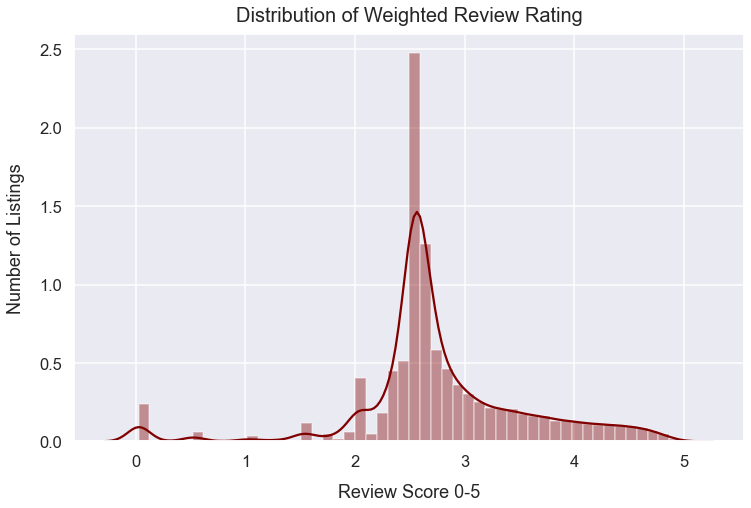

In [17]:
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')
sns.distplot(df['weighted_review_scores_rating'], color="maroon")
plt.xlabel("Review Score 0-5", labelpad=14)
plt.ylabel("Number of Listings", labelpad=14)
plt.title("Distribution of Weighted Review Rating", y=1.015, fontsize=20);

### Converting `weighted_review_scores_rating` to Binomial
For this exercise, we are going to assume that top 25% of the listings are valuable. Using the describe method, I was able to figure out that the listings with weighte review scores rating above or equal to 3.07138 makes the requirement. Therefore, we will assign 0 for listings with weighted review score rating below 3.07138, and 1 for listings with weighted review score rating above or equal to 3.07138.

In [18]:
df.describe()

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,weighted_review_scores_rating
count,"21,046.00000","21,536.00000","36,722.00000","36,722.00000","36,722.00000","36,605.00000","32,854.00000","36,128.00000","36,722.00000","36,722.00000","36,722.00000","36,722.00000","27,307.00000"
mean,0.86331,0.75619,40.72936,-73.94958,2.80036,1.16033,1.32918,1.53219,159.90480,22.48317,"60,242.37272",122.56783,2.77208
std,0.27210,0.30420,0.05556,0.04961,1.86809,0.45415,0.72270,1.11270,292.18352,28.36192,"11,207,377.70290",138.76765,0.78850
min,0.00000,0.00000,40.50863,-74.24135,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.02488
25%,0.90000,0.64000,40.68953,-73.98317,2.00000,1.00000,1.00000,1.00000,67.00000,3.00000,60.00000,0.00000,2.52488
50%,1.00000,0.89000,40.72553,-73.95499,2.00000,1.00000,1.00000,1.00000,108.00000,30.00000,"1,125.00000",57.00000,2.61964
75%,1.00000,0.99000,40.76275,-73.93133,4.00000,1.00000,1.00000,2.00000,175.00000,30.00000,"1,125.00000",259.00000,3.07138
max,1.00000,1.00000,40.91139,-73.70522,16.00000,8.00000,13.00000,24.00000,"10,000.00000","1,250.00000","2,147,483,647.00000",365.00000,4.96476


In [19]:
df['weighted_review_scores_rating'] = np.where(df['weighted_review_scores_rating'] >= 3.07138, 1,0)

In [20]:
pd.DataFrame(df.weighted_review_scores_rating.value_counts(normalize=True))

,weighted_review_scores_rating
0,0.81387
1,0.18613


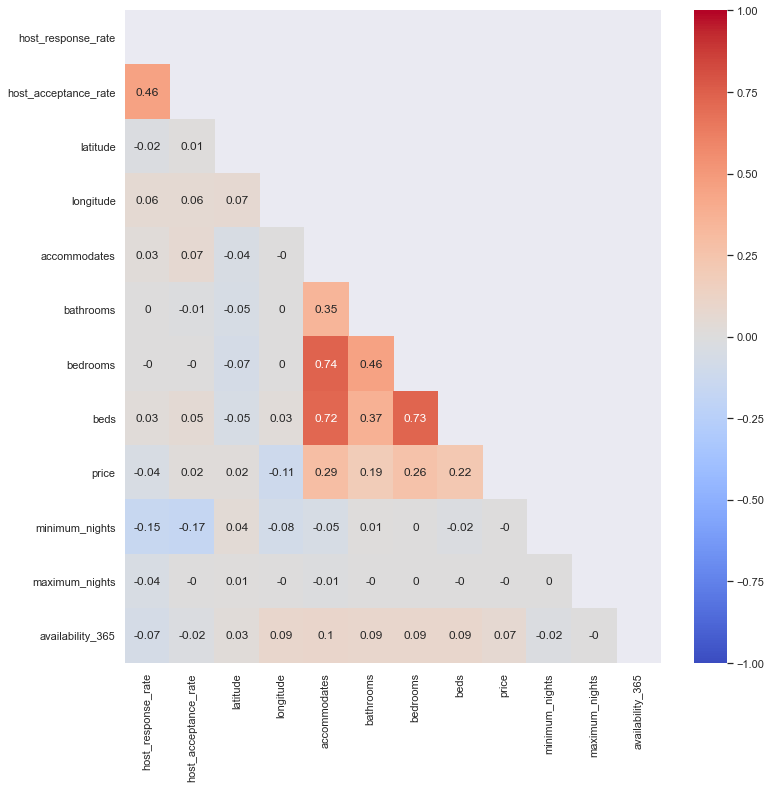

In [21]:
# Drop weighted review scores rating column to only show correlation between independent variables
corr = df.drop('weighted_review_scores_rating', axis=1).corr().round(2)


# Create mask for upper triangle of matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True


# Create heatmap correlation matrix
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1,mask=mask);

### Preprocessing
Prior to creating pipelines for different models we will be running later on, we will work on processing the data and then apply those to a column transformer to manipulate our training data. We will start by performing train-test split to prevent data leakage in the next steps.

In [22]:
X = df.drop('weighted_review_scores_rating', axis=1)
y = df['weighted_review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [23]:
# Code from Lindsey. Evaluate non-numerical columns to determine how to process them.
df[[c for c in df.columns if df[c].dtype == 'object']].describe()

,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type
count,36722,36722,36722,36722
unique,223,5,75,4
top,Bedford-Stuyvesant,Manhattan,Entire rental unit,Entire home/apt
freq,2690,16104,15445,19482


In [24]:
# Below clode is  from Lindsey that creates empty lists for different column types
ohe_cols = [] # neighbourhood_group_cleansed, room_type
freq_cols = [] # neighbourhood_cleansed, property_type
num_cols = [] # all other columns in the DataFrame


# Loop through the columns and append col to proper list
for col in X_train.columns:
    # Numeric columns
    if X_train[col].dtype in ['float64', 'int64']:
        num_cols.append(col)
        
    # Columns with fewer than 5 unique values
    elif len(X_train[col].unique()) < 6:
        ohe_cols.append(col)
            
    # Columns with more than 5 unique values
    else:
        freq_cols.append(col)          

In [25]:
# Check our work
ohe_cols

['neighbourhood_group_cleansed', 'room_type']

In [26]:
freq_cols

['neighbourhood_cleansed', 'property_type']

In [27]:
num_cols

['host_response_rate',
 'host_acceptance_rate',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'availability_365']

In [28]:
# Preprocessing steps
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ohencoder', OneHotEncoder(handle_unknown='ignore'))])

freq_transformer = Pipeline(steps=[
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('freq_enc', ce.count.CountEncoder(normalize=True, 
                                       handle_unknown=0,
                                       min_group_size=0.001,
                                       min_group_name='Other'))])

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)])

In [30]:
# Code modified from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Model 1: Logistic Regression

In [31]:
clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='liblinear', class_weight='balanced'))])
clf_logreg.fit(X_train,y_train);

Train Scores
----------
Accuracy: 0.6777531680040667
Recall: 0.6477629513343799
Precision: 0.3179847798863308
F1 Score: 0.4265684564192027
ROC-AUC: 0.7128700656025386
--------------------
Test Scores
-----------
Accuracy: 0.6722579239734233
Recall: 0.6394479585968947
Precision: 0.318259874069834
F1 Score: 0.424995222625645
ROC-AUC: 0.7108136543457636

Confusion Matrix


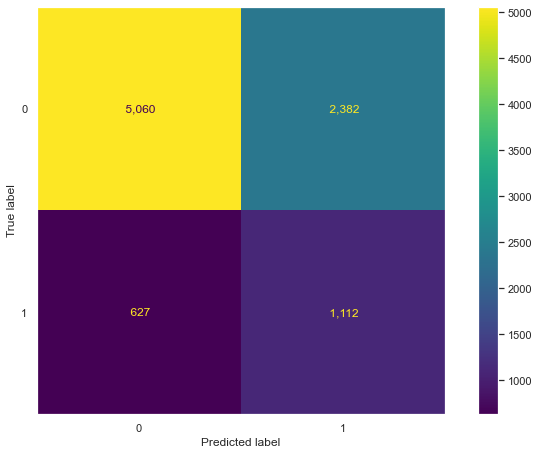

In [32]:
evaluate(clf_logreg, X_train, y_train, X_test, y_test, roc_auc='proba')

Maybe in the presentation for the best model?
The recall means "how many of this class you find over the whole number of element of this class"

The precision will be "how many are correctly classified among that class"

The f1-score is the harmonic mean between precision & recall

The support is the number of occurence of the given class in your dataset

## Model 2: K-Nearest Neighbors (KNN)

In [33]:
clf_knn = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', KNeighborsClassifier())])
clf_knn.fit(X_train,y_train);

Train Scores
----------
Accuracy: 0.859845321520642
Recall: 0.42994505494505497
Precision: 0.696439923712651
F1 Score: 0.5316670710992478
ROC-AUC: 0.8944955014752616
--------------------
Test Scores
-----------
Accuracy: 0.8028537196383836
Recall: 0.2909718228867165
Precision: 0.46722068328716526
F1 Score: 0.3586109142452162
ROC-AUC: 0.7189387077586313

Confusion Matrix


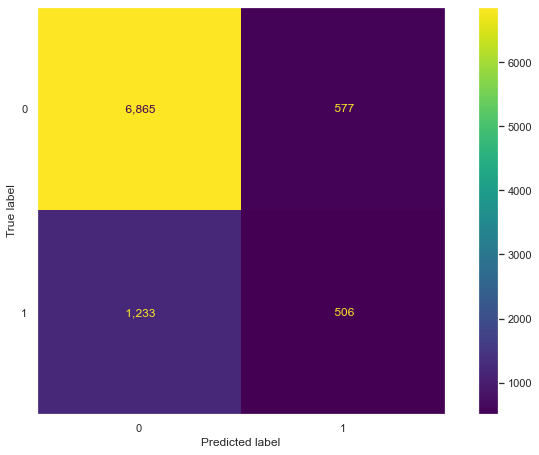

In [34]:
evaluate(clf_knn, X_train, y_train, X_test, y_test, roc_auc='proba')

## Model 3: Decision Tree

In [35]:
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', DecisionTreeClassifier(class_weight='balanced'))])
clf_dt.fit(X_train,y_train);

Train Scores
----------
Accuracy: 0.9999273809956065
Recall: 1.0
Precision: 0.9996076892899176
F1 Score: 0.9998038061604865
ROC-AUC: 0.9999999650287655
--------------------
Test Scores
-----------
Accuracy: 0.7701775405729223
Recall: 0.3858539390454284
Precision: 0.3917104495037945
F1 Score: 0.3887601390498262
ROC-AUC: 0.6229045735941618

Confusion Matrix


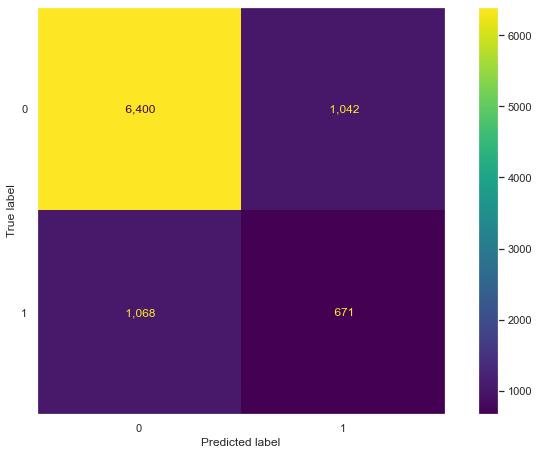

In [36]:
evaluate(clf_dt, X_train, y_train, X_test, y_test, roc_auc='proba')

## Model 4: Random Forest

In [37]:
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier(random_state=42,class_weight='balanced'))])

clf_rf.fit(X_train, y_train);

Train Scores
----------
Accuracy: 0.9998184524890164
Recall: 0.9994113029827315
Precision: 0.9996074582924436
F1 Score: 0.9995093710136395
ROC-AUC: 0.999926595378971
--------------------
Test Scores
-----------
Accuracy: 0.8393421195948154
Recall: 0.2852213916043703
Precision: 0.6813186813186813
F1 Score: 0.4021078232671261
ROC-AUC: 0.8226188987823643

Confusion Matrix


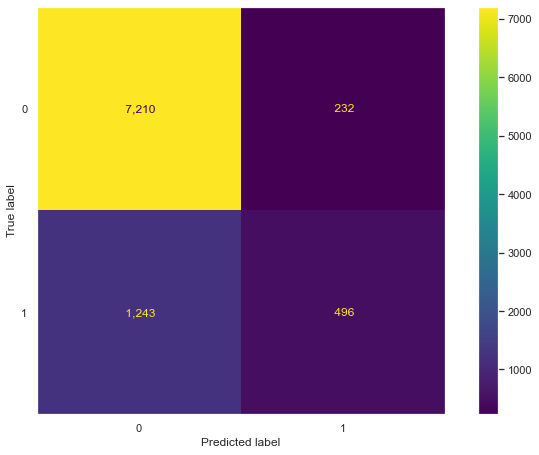

In [38]:
evaluate(clf_rf, X_train, y_train, X_test, y_test, roc_auc='proba')

## Model 5: Adaboost

In [52]:
clf_abt = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', AdaBoostClassifier())])

clf_abt.fit(X_train, y_train);

Train Scores
----------
Accuracy: 0.8236084383283105
Recall: 0.19839089481946626
Precision: 0.5667040358744395
F1 Score: 0.29389534883720936
ROC-AUC: 0.7787786112782931
--------------------
Test Scores
-----------
Accuracy: 0.821043459318157
Recall: 0.20874065554916618
Precision: 0.5761904761904761
F1 Score: 0.3064584212747995
ROC-AUC: 0.7749661209809764

Confusion Matrix


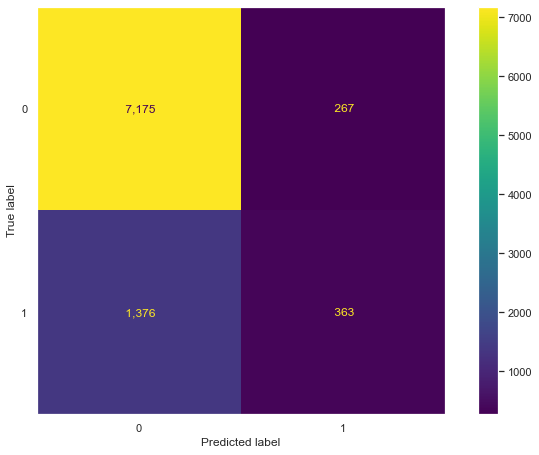

In [40]:
evaluate(clf_abt, X_train, y_train, X_test, y_test, roc_auc='dec')

## Grid Search

In [54]:
# Code borrowed and modified from https://medium.com/analytics-vidhya/ml-pipelines-using-scikit-learn-and-gridsearchcv-fe605a7f9e05
# Code borrowed from https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff

# Set grid search params
param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'classifier__penalty': ['l1', 'l2'],
        'classifier__C': param_range_fl,
        'classifier__solver': ['liblinear']}] 

grid_params_abt = [{'classifier__n_estimators': [100, 200], 
        'classifier__learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]}]

# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=clf_logreg,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 



AB = GridSearchCV(estimator=clf_abt,
            param_grid=grid_params_abt,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)


# List of pipelines for iterating through each of them
grids = [LR,AB]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'AdaBoost'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'classifier__C': 0.5, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best training accuracy: 0.689
Test set accuracy score for best params: 0.686 

Estimator: AdaBoost
Best params are : {'classifier__learning_rate': 0.5, 'classifier__n_estimators': 200}
Best training accuracy: 0.824
Test set accuracy score for best params: 0.824 

Classifier with best test set accuracy: AdaBoost


In [55]:
#pulling from the grid search for tuned decision tree
tune_lr = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(penalty='l1', C=0.5, solver='liblinear'))])

tune_lr.fit(X_train, y_train);

Train Scores
----------
Accuracy: 0.8150393958098835
Recall: 0.03120094191522763
Precision: 0.5031645569620253
F1 Score: 0.05875831485587584
ROC-AUC: 0.7285078421244605
--------------------
Test Scores
-----------
Accuracy: 0.811894129179828
Recall: 0.04082806210465785
Precision: 0.5461538461538461
F1 Score: 0.07597645799892991
ROC-AUC: 0.7277444323508354

Confusion Matrix


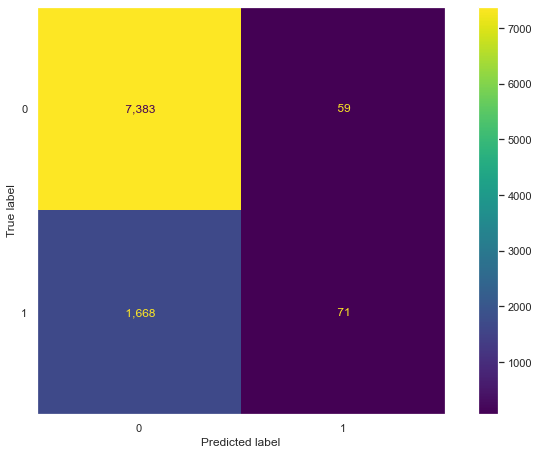

In [56]:
evaluate(tune_lr, X_train, y_train, X_test, y_test, roc_auc='proba')

In [57]:
#pulling from the grid search for tuned decision tree

tune_abt = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', AdaBoostClassifier(n_estimators=200, learning_rate=0.5))])

tune_abt.fit(X_train, y_train);

Train Scores
----------
Accuracy: 0.826186412984278
Recall: 0.18504709576138148
Precision: 0.5979708306911858
F1 Score: 0.2826315000749288
ROC-AUC: 0.7850095541412412
--------------------
Test Scores
-----------
Accuracy: 0.8243110772247032
Recall: 0.19436457734330076
Precision: 0.6145454545454545
F1 Score: 0.29532546963739625
ROC-AUC: 0.7801123397208297

Confusion Matrix


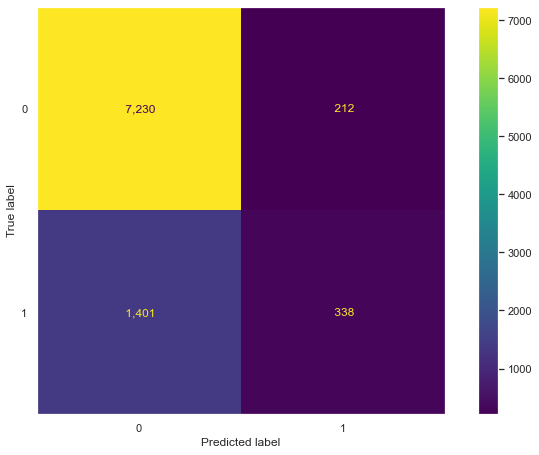

In [58]:
evaluate(tune_abt, X_train, y_train, X_test, y_test, roc_auc='proba')

## Conclusion/Next Steps